In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
# 定义一个函数来提取log文件中的dota/mAP、is_sparse_levels、score_th
def extract_map_from_log(base_dir, start_time, end_time):
    folders = []
    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)
        if os.path.isdir(folder_path):
            if start_time <= folder <= end_time:
                folders.append(folder)
    map_results = {}
    for folder in folders:
        dota_map = None
        is_sparse_levels = None
        score_th = None
        log_file = os.path.join(base_dir, folder, f"{folder}.log")
        if os.path.exists(log_file):
            with open(log_file, 'r') as f:
                lines = f.readlines()
                # 获取最后一行，提取dota/mAP
                last_line = lines[-1]
                dota_map_match = re.search(r"dota/mAP: (\d+\.\d+)", last_line)
                if dota_map_match:
                    dota_map = float(dota_map_match.group(1))
                
                # 查找is_sparse_levels 和 score_th
                for line in lines:
                    if "is_sparse_levels" in line:
                        is_sparse_levels_match = re.search(r'is_sparse_levels\s*=\s*(\[[^\]]*\])', ''.join(lines), re.DOTALL)
                        if is_sparse_levels_match:
                            is_sparse_levels = eval(is_sparse_levels_match.group(1))
                    if "score_th" in line:
                        # score_th_match = re.search(r'score_th = (\d+\.\d+)', line)
                        score_th_match = re.search(r'score_th = (\d+(\.\d+)?)', line)
                        if score_th_match:
                            score_th = float(score_th_match.group(1))
                
        if is_sparse_levels is not None and score_th is not None and dota_map is not None:
            # 将数据保存到results字典中，按is_sparse_levels和score_th分类
            if tuple(is_sparse_levels) not in map_results:
                map_results[tuple(is_sparse_levels)] = {}

            if score_th not in map_results[tuple(is_sparse_levels)]:
                map_results[tuple(is_sparse_levels)][score_th] = []

            map_results[tuple(is_sparse_levels)][score_th].append(dota_map)
            
    return map_results

In [2]:
def extract_flops_from_log(base_dir, start_time, end_time):
    # 获取目标文件夹，筛选出符合时间区间的文件夹
    folders = []
    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)
        if os.path.isdir(folder_path):
            if start_time <= folder <= end_time:
                folders.append(folder)

    # 存储数据：以is_sparse_levels为key，score_th为子key，dota_map为值
    flops_results = {}
    for folder in folders:
        flops_value = None
        is_sparse_levels = None
        score_th = None
        log_file = os.path.join(base_dir, folder, f"{folder}.log")
        
        if os.path.exists(log_file):
            with open(log_file, 'r') as f:
                lines = f.readlines()
                flops_pattern = r"Flops:\s*(\d+\.\d+)([G])"
                for line in lines:
                    if "Flops" in line:
                        match = re.search(flops_pattern, line)
                        if match:
                            flops_value = float(match.group(1))
                
                # 查找is_sparse_levels 和 score_th
                for line in lines:
                    if "is_sparse_levels" in line:
                        is_sparse_levels_match = re.search(r'is_sparse_levels\s*=\s*(\[[^\]]*\])', ''.join(lines), re.DOTALL)
                        if is_sparse_levels_match:
                            is_sparse_levels = eval(is_sparse_levels_match.group(1))
                    if "score_th" in line:
                        # score_th_match = re.search(r'score_th = (\d+\.\d+)', line)
                        score_th_match = re.search(r'score_th = (\d+(\.\d+)?)', line)
                        if score_th_match:
                            score_th = float(score_th_match.group(1))
        if is_sparse_levels is not None and score_th is not None and flops_value is not None:
            # 将数据保存到results字典中，按is_sparse_levels和score_th分类
            if tuple(is_sparse_levels) not in flops_results:
                flops_results[tuple(is_sparse_levels)] = {}

            if score_th not in flops_results[tuple(is_sparse_levels)]:
                flops_results[tuple(is_sparse_levels)][score_th] = []

            flops_results[tuple(is_sparse_levels)][score_th].append(flops_value)
            
    return flops_results

In [3]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
# 定义一个函数来提取log文件中的dota/mAP、is_sparse_levels、score_th
def extract_pr_from_log(base_dir, start_time, end_time):
    folders = []
    for folder in os.listdir(base_dir):
        folder_path = os.path.join(base_dir, folder)
        if os.path.isdir(folder_path):
            if start_time <= folder <= end_time:
                folders.append(folder)
    map_results = {}
    for folder in folders:
        dota_map = None
        is_sparse_levels = None
        score_th = None
        log_file = os.path.join(base_dir, folder, f"{folder}.log")
        if os.path.exists(log_file):
            with open(log_file, 'r') as f:
                lines = f.readlines()
                # 获取最后一行，提取dota/mAP
                last_line = lines[-2]
                # 正则表达式：提取{'1': {'all': 数值}}中的数值
                # {'1': {'all': 0.6192400970088925}
                # dict_match = re.search(r"\{'1': \{'all': (\d+\.\d+)\}\}", last_line)
                dict_match = re.search(r"\{'1':\s*\{'all':\s*(\d+\.\d+)\}", last_line)
                # print(dict_match)
                if dict_match:
                    dota_map = float(dict_match.group(1))  # 提取并转换为浮动数值
               
                # 查找is_sparse_levels 和 score_th
                for line in lines:
                    if "is_sparse_levels" in line:
                        is_sparse_levels_match = re.search(r'is_sparse_levels\s*=\s*(\[[^\]]*\])', ''.join(lines), re.DOTALL)
                        if is_sparse_levels_match:
                            is_sparse_levels = eval(is_sparse_levels_match.group(1))
                    if "score_th" in line:
                        # score_th_match = re.search(r'score_th = (\d+\.\d+)', line)
                        score_th_match = re.search(r'score_th = (\d+(\.\d+)?)', line)
                        if score_th_match:
                            score_th = float(score_th_match.group(1))
                
        if is_sparse_levels is not None and score_th is not None and dota_map is not None:
            # 将数据保存到results字典中，按is_sparse_levels和score_th分类
            if tuple(is_sparse_levels) not in map_results:
                map_results[tuple(is_sparse_levels)] = {}

            if score_th not in map_results[tuple(is_sparse_levels)]:
                map_results[tuple(is_sparse_levels)][score_th] = []

            map_results[tuple(is_sparse_levels)][score_th].append(dota_map)
            
    return map_results

### MAR20

In [4]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# l
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_l_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_mar20test"
start_time = "20250222_220636"
end_time = "20250222_234205"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_l_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_mar20test/infos"
info_start_time = "20250223_110814"
info_end_time = "20250223_122055"
MAR20l_results = extract_map_from_log(base_dir, start_time, end_time)
MAR20l_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)


# m
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_m_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_mar20test"
start_time = "20250223_104559"
end_time = "20250223_122622"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_m_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_mar20test/infos"
info_start_time = "20250223_142947"
info_end_time = "20250223_155447"
MAR20m_results = extract_map_from_log(base_dir, start_time, end_time)
MAR20m_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)


# s
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_s_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_mar20test"
start_time = "20250223_110100"
end_time = "20250223_123846"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_s_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_mar20test/infos"
info_start_time = "20250223_143059"
info_end_time = "20250223_154913"
MAR20s_results = extract_map_from_log(base_dir, start_time, end_time)
MAR20s_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)

## HRSC

In [5]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# l
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_l_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_hrsctest"
start_time = "20250226_122922"
end_time = "20250226_142810"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_l_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_hrsctest/infos"
info_start_time = "20250226_150352"
info_end_time = "20250226_160727"
hrscl_results = extract_map_from_log(base_dir, start_time, end_time)
hrscl_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)


# m
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_m_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_hrsctest"
start_time = "20250226_122438"
end_time = "20250226_141759"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_m_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_hrsctest/infos"
info_start_time = "20250226_150435"
info_end_time = "20250226_160511"
hrscm_results = extract_map_from_log(base_dir, start_time, end_time)
hrscm_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)


# s
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_s_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_hrsctest"
start_time = "20250226_122712"
end_time = "20250226_141813"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_s_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_hrsctest/infos"
info_start_time = "20250226_150457"
info_end_time = "20250226_155829"
hrscs_results = extract_map_from_log(base_dir, start_time, end_time)
hrscs_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)

## VEDAI

In [6]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# l
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_l_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_vedaitest"
start_time = "20250228_215710"
end_time = "20250301_002949"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_l_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_vedaitest/infos"
info_start_time = "20250301_110614"
info_end_time = "20250301_120028"
vedail_results = extract_map_from_log(base_dir, start_time, end_time)
vedail_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)


# m
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_m_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_vedaitest"
start_time = "20250228_215945"
end_time = "20250301_002458"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_m_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_vedaitest/infos"
info_start_time = "20250301_110728"
info_end_time = "20250301_115641"
vedaim_results = extract_map_from_log(base_dir, start_time, end_time)
vedaim_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)


# s
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_s_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_vedaitest"
start_time = "20250228_220100"
end_time = "20250301_001946"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_s_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_vedaitest/infos"
info_start_time = "20250301_110815"
info_end_time = "20250301_115853"
vedais_results = extract_map_from_log(base_dir, start_time, end_time)
vedais_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)

## DOTAv2 (val)

In [7]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# l
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_l_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_dotav2test"
start_time = "20250212_003736"
end_time = "20250212_054258"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_l_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_dotav2test/infos"
info_start_time = "20250212_222032"
info_end_time = "20250212_235424"
dotal_results = extract_map_from_log(base_dir, start_time, end_time)
dotal_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)
dotal_results[(1,0,0)].update({0: [0.8488]})
dotal_results[(1,1,0)].update({0: [0.8488]})
dotal_results[(1,1,1)].update({0: [0.8488]})
dotal_results_flops[(1,0,0)].update({0: [229.148]})
dotal_results_flops[(1,1,0)].update({0: [229.148]})
dotal_results_flops[(1,1,1)].update({0: [229.148]})

# m
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_m_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_dotav2test"
start_time = "20250212_175149"
end_time = "20250213_014443"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_m_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_dotav2test/infos"
info_start_time = "20250213_113919"
info_end_time = "20250213_124442"
dotam_results = extract_map_from_log(base_dir, start_time, end_time)
dotam_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)
dotam_results[(1,0,0)].update({0: [0.8226]})
dotam_results[(1,1,0)].update({0: [0.8226]})
dotam_results[(1,1,1)].update({0: [0.8226]})

# s
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_s_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_dotav2test"
start_time = "20250212_181756"
end_time = "20250213_021123"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_s_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_dotav2test/infos"
info_start_time = "20250213_114200"
info_end_time = "20250213_124413"
dotas_results = extract_map_from_log(base_dir, start_time, end_time)
dotas_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)
dotas_results[(1,0,0)].update({0: [0.7596]})
dotas_results[(1,1,0)].update({0: [0.7596]})
dotas_results[(1,1,1)].update({0: [0.7596]})

## FAIR1Mv2 (val)

In [8]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# l
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_l_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_fairv2trainval"
start_time = "20250227_163641"
end_time = "20250228_170036"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_l_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_fairv2trainval/infos"
info_start_time = "20250228_223452"
info_end_time = "20250301_010845"
fairl_results = extract_map_from_log(base_dir, start_time, end_time)
fairl_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)


# m
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_m_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_fairv2trainval"
start_time = "20250227_164118"
end_time = "20250228_152318"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_m_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_fairv2trainval/infos"
info_start_time = "20250228_223643"
info_end_time = "20250301_010622"
fairm_results = extract_map_from_log(base_dir, start_time, end_time)
fairm_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)


# s
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_s_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_fairv2trainval"
start_time = "20250227_164344"
end_time = "20250228_151012"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_s_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_fairv2trainval/infos"
info_start_time = "20250228_223809"
info_end_time = "20250301_010210"
fairs_results = extract_map_from_log(base_dir, start_time, end_time)
fairs_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)

## DIOR-RSVG

In [9]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# l
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_l_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_diorrsvgtest"
start_time = "20250215_134332"
end_time = "20250216_024333"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_l_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_diorrsvgtest/infos"
info_start_time = "20250218_152057"
info_end_time = "20250218_174301"
diorrsvgl_results = extract_pr_from_log(base_dir, start_time, end_time)
diorrsvgl_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)


# m
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_m_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_diorrsvgtest"
start_time = "20250215_134401"
end_time = "20250216_015645"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_m_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_diorrsvgtest/infos"
info_start_time = "20250218_152524"
info_end_time = "20250218_173527"
diorrsvgm_results = extract_pr_from_log(base_dir, start_time, end_time)
diorrsvgm_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)


# s
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_s_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_diorrsvgtest"
start_time = "20250215_134504"
end_time = "20250215_234716"
info_base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_s_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_diorrsvgtest/infos"
info_start_time = "20250218_152624"
info_end_time = "20250218_173249"
diorrsvgs_results = extract_pr_from_log(base_dir, start_time, end_time)
diorrsvgs_results_flops = extract_flops_from_log(info_base_dir, info_start_time, info_end_time)

## FIG

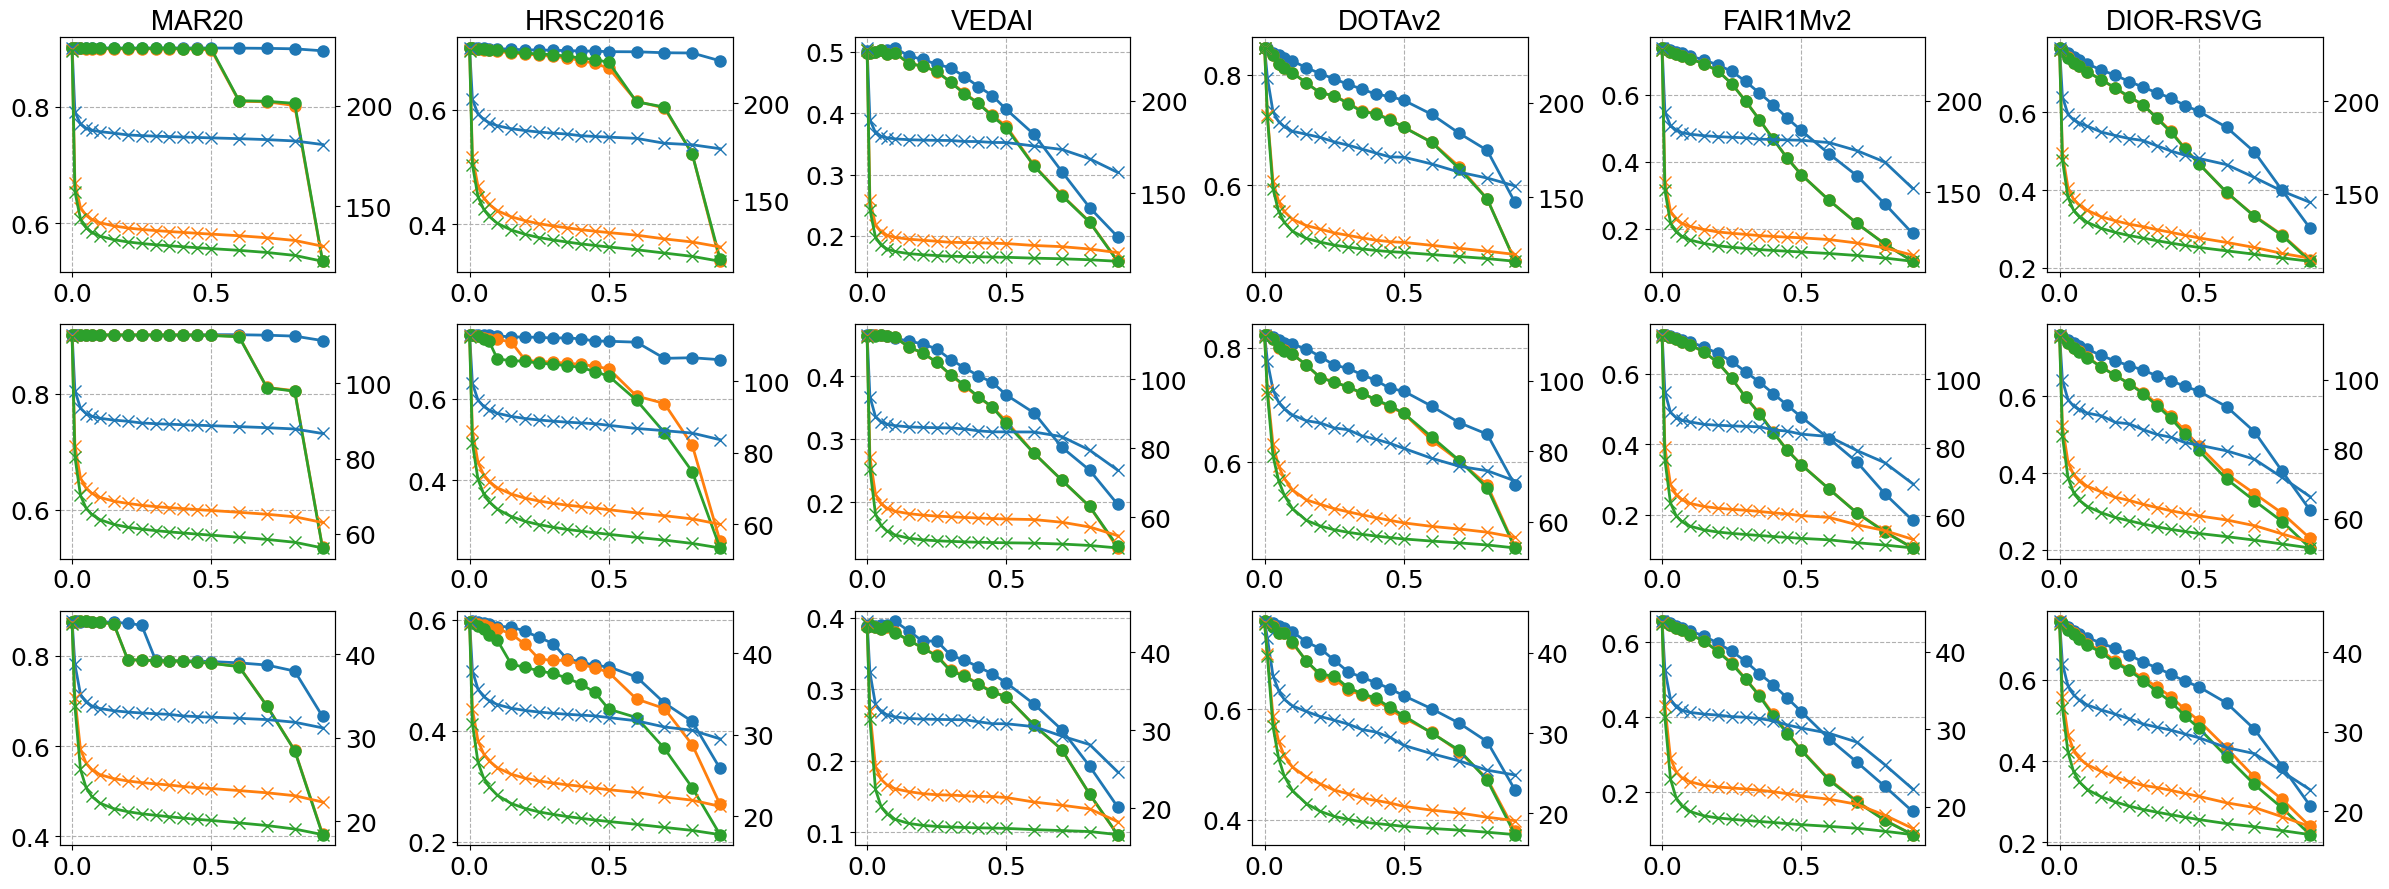

In [23]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.font_manager import FontProperties

# 设置字体
font1 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=22)
font2 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=20)
font3 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=22)

# 创建3x6的子图
fig, axes = plt.subplots(3, 6, figsize=(24, 9))

# Flatten the axes array to easily iterate through it
axes = axes.flatten()

# 设置每个数据集的名称
dataset_names = [
    'MAR20l_results_flops', 'hrscl_results_flops', 'vedail_results_flops', 'dotal_results_flops', 'fairl_results_flops', 'diorrsvgl_results_flops',
    'MAR20m_results_flops', 'hrscm_results_flops', 'vedaim_results_flops', 'dotam_results_flops', 'fairm_results_flops', 'diorrsvgm_results_flops',
    'MAR20s_results_flops', 'hrscs_results_flops', 'vedais_results_flops', 'dotas_results_flops', 'fairs_results_flops', 'diorrsvgs_results_flops',
]
# 循环绘制每个数据集的图
name = ['MAR20', 'HRSC2016', 'VEDAI', 'DOTAv2', 'FAIR1Mv2', 'DIOR-RSVG']
color = ['blue', 'green', 'orange']
for idx, dataset_name in enumerate(dataset_names):
    # Get current axis
    ax1 = axes[idx]
    ax2 = ax1.twinx()  # 创建双y轴

    # 获取当前数据集的flops和mAP数据
    results_flops = globals()[dataset_name]  # 获取当前数据集的变量
    is_sparse_levels=[(1,0,0), (1,1,0), (1,1,1)]
    results = globals()[dataset_name.replace("_flops", "")]  # 生成mAP数据
    for i, is_sparse_level in enumerate(is_sparse_levels):
        score_map = results_flops[is_sparse_level]
        score_th_list = sorted(score_map.keys())  # 按 score_th 升序排序
        
        # 计算 mean_flops_value_list 和 mean_mAP_list
        mean_flops_value_list = [np.mean(score_map[score_th]) for score_th in score_th_list]  # 对同一score_th的Flops取平均值
        mean_mAP_list = [np.mean(results[is_sparse_level][score_th]) for score_th in score_th_list]  # 对同一score_th的dota/mAP取平均值

        # 使用不同的颜色和标记绘制每个 is_sparse_levels 配置的曲线
        line1, = ax1.plot(score_th_list, mean_mAP_list, label=f"mAP {is_sparse_level}", marker='o', linewidth=2, markersize=8)
        line2, = ax2.plot(score_th_list, mean_flops_value_list, label=f"Flops {is_sparse_level}", marker='x', markerfacecolor='none', linewidth=2, markersize=8)
        
        # handles.extend([line1, line2])
        # labels.extend([f"Flops {is_sparse_level}", f"mAP {is_sparse_level}"])
    
    
    # 设置标题和标签
    # ax1.set_xlabel("Threshold", fontproperties=font3)
    # ax1.set_ylabel("mAP", fontproperties=font3)
    # ax2.set_ylabel("Flops", fontproperties=font3)
    
    ax1.tick_params(axis='y', labelsize=18)
    ax1.tick_params(axis='x', labelsize=18)
    ax2.tick_params(axis='y', labelsize=18)

    # 添加网格
    ax1.grid(True, which="both", linestyle="--", linewidth=0.8)

    # 设置子图标题
    if idx<6:
        ax1.set_title(name[idx], fontproperties=font2)

# 调整布局，避免重叠
plt.tight_layout()
plt.savefig("sparse.jpg", dpi=300)
# 显示图表
plt.show()


['#1f77b4', '#ff7f0e', '#2ca02c']


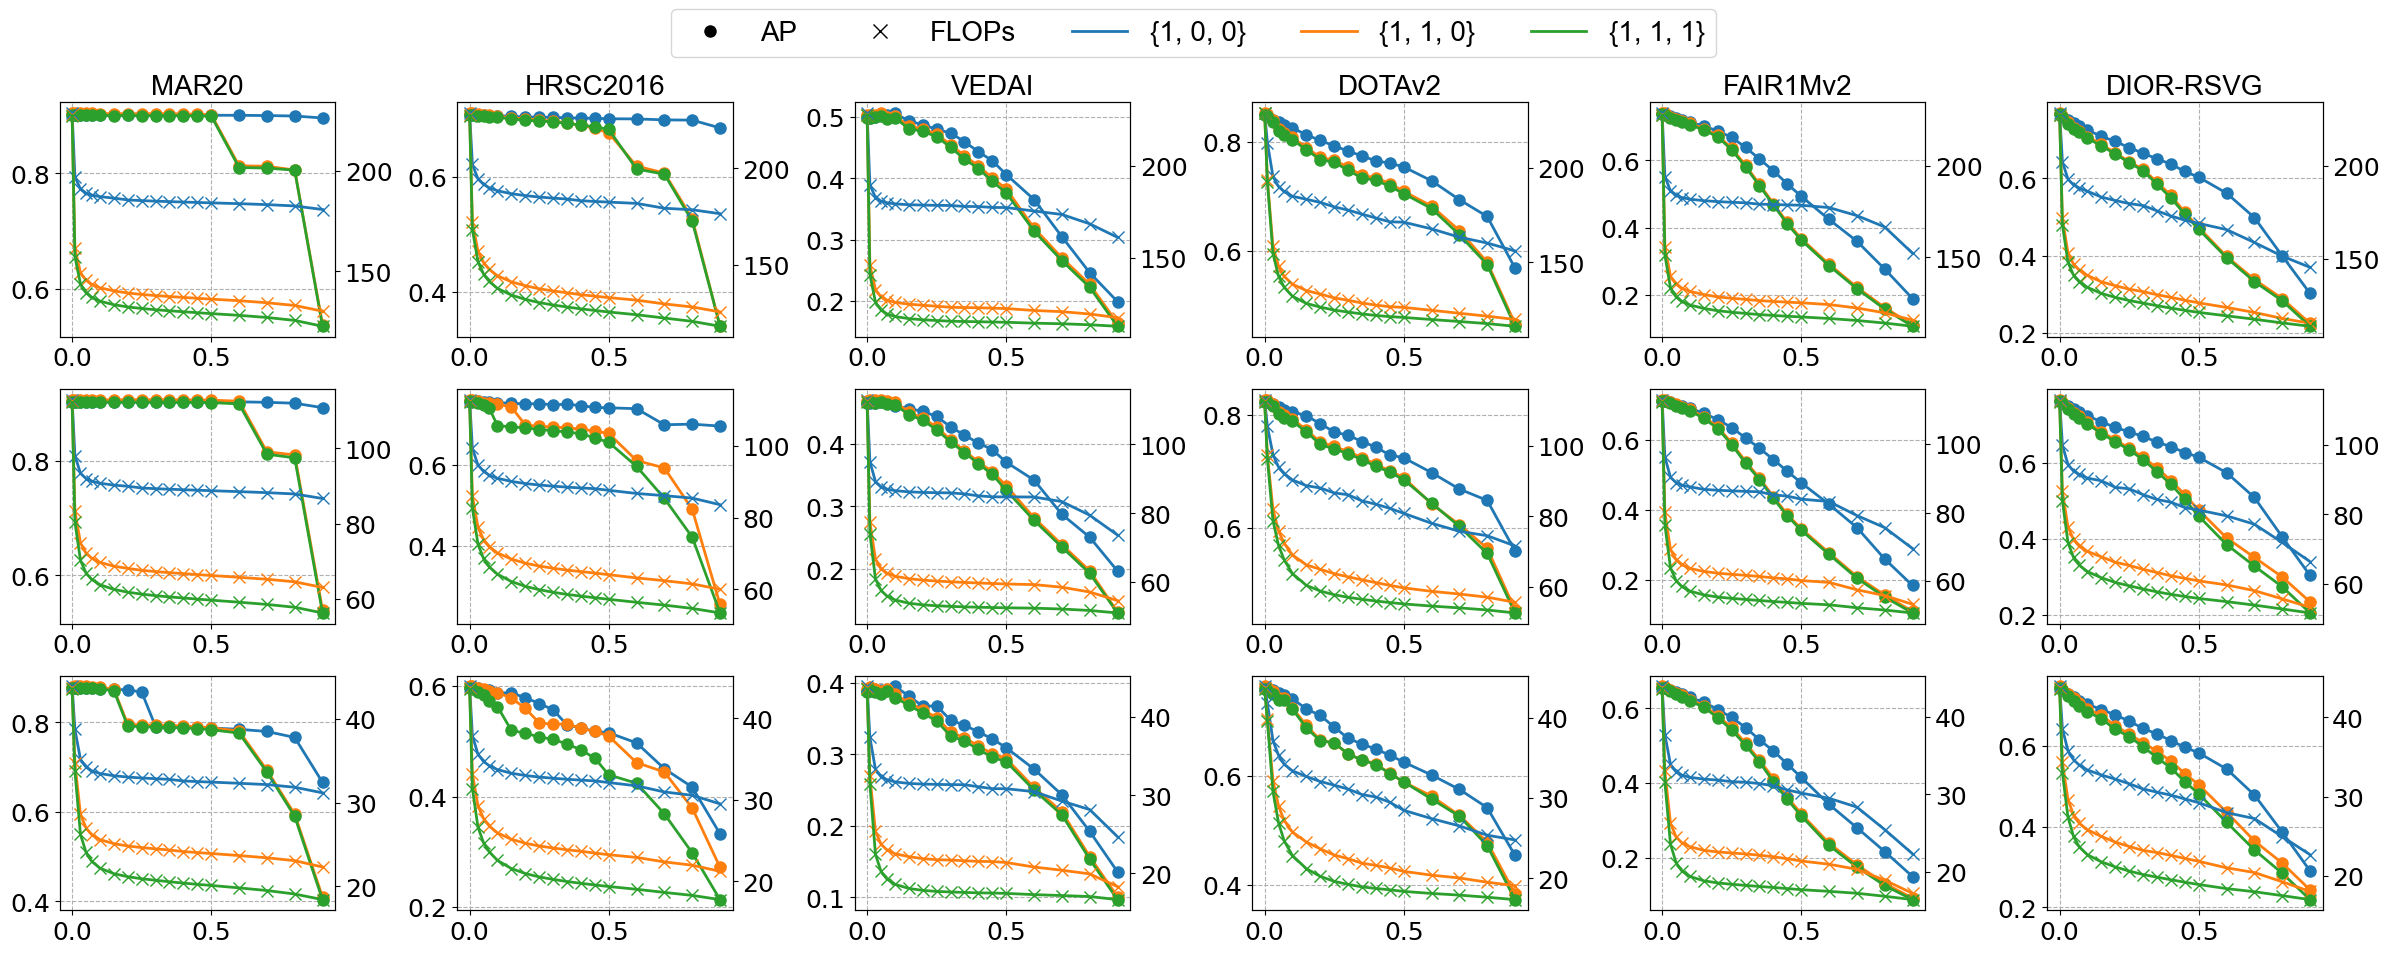

In [19]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.font_manager import FontProperties
from matplotlib.lines import Line2D

# 设置字体 
font1 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=22)
font2 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=20)
font3 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=22)

# 创建3x6的子图
fig, axes = plt.subplots(3, 6, figsize=(24, 9))

# Flatten the axes array to easily iterate through it
axes = axes.flatten()

# 设置每个数据集的名称
dataset_names = [
    'MAR20l_results_flops', 'hrscl_results_flops', 'vedail_results_flops', 'dotal_results_flops', 'fairl_results_flops', 'diorrsvgl_results_flops',
    'MAR20m_results_flops', 'hrscm_results_flops', 'vedaim_results_flops', 'dotam_results_flops', 'fairm_results_flops', 'diorrsvgm_results_flops',
    'MAR20s_results_flops', 'hrscs_results_flops', 'vedais_results_flops', 'dotas_results_flops', 'fairs_results_flops', 'diorrsvgs_results_flops',
]

# 循环绘制每个数据集的图
name = ['MAR20', 'HRSC2016', 'VEDAI', 'DOTAv2', 'FAIR1Mv2', 'DIOR-RSVG']
# color = ['blue', 'green', 'orange']
color_list = []

for idx, dataset_name in enumerate(dataset_names):
    # Get current axis
    ax1 = axes[idx]
    ax2 = ax1.twinx()  # 创建双y轴

    # 获取当前数据集的flops和mAP数据
    results_flops = globals()[dataset_name]  # 获取当前数据集的变量
    is_sparse_levels=[(1,0,0), (1,1,0), (1,1,1)]
    results = globals()[dataset_name.replace("_flops", "")]  # 生成mAP数据
    for i, is_sparse_level in enumerate(is_sparse_levels):
        score_map = results_flops[is_sparse_level]
        score_th_list = sorted(score_map.keys())  # 按 score_th 升序排序
        
        # 计算 mean_flops_value_list 和 mean_mAP_list
        if is_sparse_level==(1,1,0):
            mean_flops_value_list = [np.mean(score_map[score_th]) for score_th in score_th_list]  # 对同一score_th的Flops取平均值
            mean_mAP_list = [np.mean(results[is_sparse_level][score_th])+0.004 for score_th in score_th_list]  # 对同一score_th的dota/mAP取平均值
        else:
            mean_flops_value_list = [np.mean(score_map[score_th]) for score_th in score_th_list]  # 对同一score_th的Flops取平均值
            mean_mAP_list = [np.mean(results[is_sparse_level][score_th]) for score_th in score_th_list]  # 对同一score_th的dota/mAP取平均值
        # 使用不同的颜色和标记绘制每个 is_sparse_levels 配置的曲线
        line1, = ax1.plot(score_th_list, mean_mAP_list, label=f"mAP {is_sparse_level}", marker='o', linewidth=2, markersize=8)
        line2, = ax2.plot(score_th_list, mean_flops_value_list, label=f"Flops {is_sparse_level}", marker='x', markerfacecolor='none', linewidth=2, markersize=8)

        color_1 = line1.get_color()
        color_2 = line2.get_color()
        
        if color_1 not in color_list:
            color_list.append(color_1)
        if color_2 not in color_list:
            color_list.append(color_2)
        
    # 设置标题和标签
    ax1.tick_params(axis='y', labelsize=18)
    ax1.tick_params(axis='x', labelsize=18)
    ax2.tick_params(axis='y', labelsize=18)

    # 添加网格
    ax1.grid(True, which="both", linestyle="--", linewidth=0.8)

    # 设置子图标题
    if idx < 6:
        ax1.set_title(name[idx], fontproperties=font2)

print(color_list)

# 1. 创建定制的图例
# 圆点对应AP
handle_ap = Line2D([0], [0], marker='o', color='w', markerfacecolor='black', markersize=10, label='AP')
# 叉号对应FLOPs
handle_flops = Line2D([0], [0], marker='x', color='none', markeredgecolor='black', markersize=10, label='FLOPs')


# 添加三条不同颜色的线，代表不同的 is_sparse_level
handle_fp32 = Line2D([0], [0], color='#1f77b4', lw=2, label=f'{{1, 0, 0}}')
handle_fp16 = Line2D([0], [0], color='#2ca02c', lw=2, label=f'{{1, 1, 1}}')
handle_int8 = Line2D([0], [0], color='#ff7f0e', lw=2, label=f'{{1, 1, 0}}')

# 将这些元素添加到图例
handles = [handle_ap, handle_flops, handle_fp32, handle_int8, handle_fp16]
labels = [h.get_label() for h in handles]
plt.tight_layout()
# 2. 将图例放置在上方
#plt.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5, prop=font2)
plt.legend(handles=handles, labels=labels, loc='upper center', bbox_to_anchor=(-3.1, 3.9), ncol=5, prop=font2)
# 调整布局，避免重叠
# 调整布局，避免重叠，增加顶部间距
# plt.subplots_adjust(top=5)

# 保存图像
plt.savefig("sparse_new.jpg", dpi=300, bbox_inches='tight')

# 显示图表
# plt.show()

## YWSP-M

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# 配置文件夹路径
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_m_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_dotav2test"
start_time = "20250212_175149"
end_time = "20250213_014443"

# 定义一个函数来提取log文件中的dota/mAP、is_sparse_levels、score_th
def extract_data_from_log(log_file):
    dota_map = None
    is_sparse_levels = None
    score_th = None

    with open(log_file, 'r') as f:
        lines = f.readlines()
        # 获取最后一行，提取dota/mAP
        last_line = lines[-1]
        dota_map_match = re.search(r"dota/mAP: (\d+\.\d+)", last_line)
        if dota_map_match:
            dota_map = float(dota_map_match.group(1))
        
        # 查找is_sparse_levels 和 score_th
        for line in lines:
            if "is_sparse_levels" in line:
                is_sparse_levels_match = re.search(r'is_sparse_levels\s*=\s*(\[[^\]]*\])', ''.join(lines), re.DOTALL)
                if is_sparse_levels_match:
                    is_sparse_levels = eval(is_sparse_levels_match.group(1))
            if "score_th" in line:
                score_th_match = re.search(r'score_th = (\d+\.\d+)', line)
                if score_th_match:
                    score_th = float(score_th_match.group(1))

    return dota_map, is_sparse_levels, score_th


# 获取目标文件夹，筛选出符合时间区间的文件夹
folders = []
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        if start_time <= folder <= end_time:
            folders.append(folder)

# 存储数据：以is_sparse_levels为key，score_th为子key，dota_map为值
results = {}

# 遍历文件夹，读取数据
for folder in folders:
    log_file = os.path.join(base_dir, folder, f"{folder}.log")
    
    if os.path.exists(log_file):
        dota_map, is_sparse_levels, score_th = extract_data_from_log(log_file)
        
        if is_sparse_levels is not None and score_th is not None and dota_map is not None:
            # 将数据保存到results字典中，按is_sparse_levels和score_th分类
            if tuple(is_sparse_levels) not in results:
                results[tuple(is_sparse_levels)] = {}

            if score_th not in results[tuple(is_sparse_levels)]:
                results[tuple(is_sparse_levels)][score_th] = []

            results[tuple(is_sparse_levels)][score_th].append(dota_map)
###ywspm add  th=0 ###
results[(1,0,0)].update({0: [0.8226]})
results[(1,1,0)].update({0: [0.8226]})
results[(1,1,1)].update({0: [0.8226]})
# # 绘制图表
# plt.figure(figsize=(10, 6))

# # 遍历不同的is_sparse_levels组合，分别绘制不同的曲线
# for is_sparse_levels, score_map in results.items():
#     score_th_list = sorted(score_map.keys())  # 按score_th升序排序
#     mean_dota_map_list = [np.mean(score_map[score_th]) for score_th in score_th_list]  # 对同一score_th的dota/mAP取平均值

#     plt.plot(score_th_list, mean_dota_map_list, label=f'is_sparse_levels = {is_sparse_levels}')

# # 设置图表标签和标题
# plt.xlabel('score_th')
# plt.ylabel('dota/mAP')
# plt.title('dota/mAP vs score_th for different is_sparse_levels')
# plt.legend()
# plt.grid(True)

# # 显示图表
# plt.show()


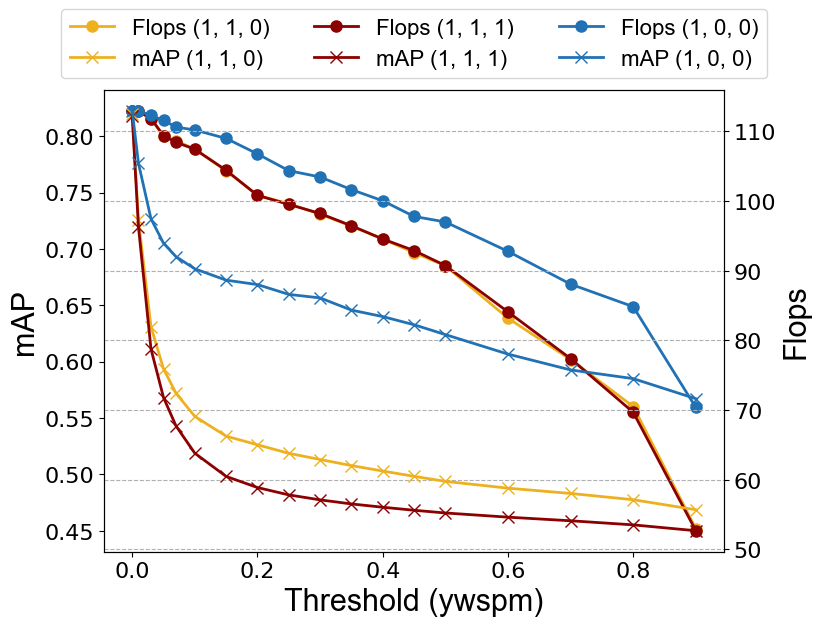

In [2]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.font_manager import FontProperties
font1 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=22)
font2 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=16)
font3 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=22)
# 配置文件夹路径
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_m_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_dotav2test/infos"
start_time = "20250213_113919"
end_time = "20250213_124442"

# 定义一个函数来提取log文件中的dota/mAP、is_sparse_levels、score_th
def extract_data_from_log(log_file):
    dota_map = None
    is_sparse_levels = None
    score_th = None

    with open(log_file, 'r') as f:
        lines = f.readlines()
        flops_pattern = r"Flops:\s*(\d+\.\d+)([G])"
        for line in lines:
            if "Flops" in line:
                match = re.search(flops_pattern, line)
                if match:
                    flops_value = float(match.group(1))
        
        # 查找is_sparse_levels 和 score_th
        for line in lines:
            if "is_sparse_levels" in line:
                is_sparse_levels_match = re.search(r'is_sparse_levels\s*=\s*(\[[^\]]*\])', ''.join(lines), re.DOTALL)
                if is_sparse_levels_match:
                    is_sparse_levels = eval(is_sparse_levels_match.group(1))
            if "score_th" in line:
                # score_th_match = re.search(r'score_th = (\d+\.\d+)', line)
                score_th_match = re.search(r'score_th = (\d+(\.\d+)?)', line)
                if score_th_match:
                    score_th = float(score_th_match.group(1))

    return flops_value, is_sparse_levels, score_th
colors = {
    "FP32": "#edb120",  # 深蓝色
    "FP16": "darkred",  # 粉色
    "INT8": "#2171b5",  # 浅黄色
}


# 获取目标文件夹，筛选出符合时间区间的文件夹
folders = []
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        if start_time <= folder <= end_time:
            folders.append(folder)

# 存储数据：以is_sparse_levels为key，score_th为子key，dota_map为值
results_flops = {}

# 遍历文件夹，读取数据
for folder in folders:
    log_file = os.path.join(base_dir, folder, f"{folder}.log")
    
    if os.path.exists(log_file):
        flops_value, is_sparse_levels, score_th = extract_data_from_log(log_file)
        
        if is_sparse_levels is not None and score_th is not None and flops_value is not None:
            # 将数据保存到results字典中，按is_sparse_levels和score_th分类
            if tuple(is_sparse_levels) not in results_flops:
                results_flops[tuple(is_sparse_levels)] = {}

            if score_th not in results_flops[tuple(is_sparse_levels)]:
                results_flops[tuple(is_sparse_levels)][score_th] = []

            results_flops[tuple(is_sparse_levels)][score_th].append(flops_value)

fig, ax1 = plt.subplots(figsize=(8,6))

ax2 = ax1.twinx()
handles = []
labels = []
color_index = 0
color_list = list(colors.values())
# 循环绘制每个 is_sparse_levels 配置
for is_sparse_levels, score_map in results_flops.items():
    score_th_list = sorted(score_map.keys())  # 按 score_th 升序排序
    
    # 计算 mean_flops_value_list 和 mean_mAP_list
    mean_flops_value_list = [np.mean(score_map[score_th]) for score_th in score_th_list]  # 对同一score_th的Flops取平均值
    mean_mAP_list = [np.mean(results[is_sparse_levels][score_th]) for score_th in score_th_list]  # 对同一score_th的dota/mAP取平均值
    # 根据 is_sparse_levels 选择颜色
    color = color_list[color_index % len(color_list)]
    color_index += 1
    # 使用不同的颜色和标记绘制每个 is_sparse_levels 配置的曲线
    line1, = ax1.plot(score_th_list, mean_mAP_list, label=f"mAP {is_sparse_levels}", marker='o', color=color, linewidth=2, markersize=8)
    line2, = ax2.plot(score_th_list, mean_flops_value_list, label=f"Flops {is_sparse_levels}", marker='x', color=color, markerfacecolor='none', linewidth=2, markersize=8)
    
    handles.extend([line1, line2])
    labels.extend([f"Flops {is_sparse_levels}", f"mAP {is_sparse_levels}"])
    
# 设置图表标题
# plt.title(f'Flops and mAP vs score_th for different is_sparse_levels (DOTAv2 val)')

# 设置x轴和y轴标签
ax1.set_xlabel("Threshold (ywspm)", fontproperties=font3)
ax2.set_ylabel('Flops', fontproperties=font3)  # 左边y轴（Flops）
ax1.set_ylabel('mAP', fontproperties=font3)  # 右边y轴（mAP）
ax1.tick_params(axis='y', labelsize=16)  # 设置左边y轴刻度字体大小
ax1.tick_params(axis='x', labelsize=16)  # 设置x轴刻度字体大小
ax2.tick_params(axis='y', labelsize=16) 
# ax2.invert_yaxis() 
# 显示图例
plt.legend(handles=handles, labels=labels, loc='center', bbox_to_anchor=(0.5, 1.1), ncol=3, prop=font2)


plt.grid(True, which="both", linestyle="--", linewidth=0.8)

# 显示图表
plt.savefig("ywspm.jpg", dpi=300)
plt.show()


In [3]:
import pandas as pd
# Prepare data for output table
score_ths = sorted(set(list(results[(1, 1, 0)].keys()) + list(results_flops[(1, 1, 0)].keys())))

# Create dataframe for the results
data = []
for score_th in score_ths:
    row = {
        "score_th": score_th,
        "(1, 1, 0) mAP": results[(1, 1, 0)].get(score_th, [None])[0],
        "(1, 1, 0) Flops": results_flops[(1, 1, 0)].get(score_th, [None])[0],
        "(1, 1, 1) mAP": results[(1, 1, 1)].get(score_th, [None])[0],
        "(1, 1, 1) Flops": results_flops[(1, 1, 1)].get(score_th, [None])[0],
        "(1, 0, 0) mAP": results[(1, 0, 0)].get(score_th, [None])[0],
        "(1, 0, 0) Flops": results_flops[(1, 0, 0)].get(score_th, [None])[0],
    }
    data.append(row)

df = pd.DataFrame(data)



In [4]:
df

score_th  (1, 1, 0) mAP  (1, 1, 0) Flops  (1, 1, 1) mAP  (1, 1, 1) Flops  \
0       0.00         0.8226          112.502         0.8226          112.244   
1       0.01         0.8221           97.239         0.8221           96.272   
2       0.03         0.8155           81.960         0.8156           78.755   
3       0.05         0.8001           75.893         0.8005           71.789   
4       0.07         0.7960           72.405         0.7946           67.698   
5       0.10         0.7885           69.075         0.7884           63.793   
6       0.15         0.7693           66.247         0.7697           60.460   
7       0.20         0.7476           65.004         0.7475           58.864   
8       0.25         0.7401           63.778         0.7395           57.808   
9       0.30         0.7308           62.890         0.7314           57.094   
10      0.35         0.7202           62.019         0.7205           56.509   
11      0.40         0.7087           61.233         0.7088           56.036   
12      0.45         0.6967           60.475         0.6985           55.601   
13      0.50         0.6850           59.752         0.6852           55.210   
14      0.60         0.6385           58.773         0.6441           54.610   
15      0.70         0.6018           58.015         0.6026           54.091   
16      0.80         0.5601           57.116         0.5550           53.503   
17      0.90         0.4516           55.672         0.4499           52.662   

    (1, 0, 0) mAP  (1, 0, 0) Flops  
0          0.8226          112.979  
1          0.8225          105.418  
2          0.8185           97.457  
3          0.8140           93.948  
4          0.8081           92.016  
5          0.8055           90.273  
6          0.7980           88.644  
7          0.7843           88.010  
8          0.7694           86.602  
9          0.7638           86.096  
10         0.7526           84.344  
11         0.7427           83.417  
12         0.7288           82.245  
13         0.7239           80.829  
14         0.6978           78.027  
15         0.6687           75.754  
16         0.6487           74.505  
17         0.5593           71.619

## YWSP-S

In [43]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# 配置文件夹路径
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_s_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_dotav2test"
start_time = "20250212_181756"
end_time = "20250213_021123"

# 定义一个函数来提取log文件中的dota/mAP、is_sparse_levels、score_th
def extract_data_from_log(log_file):
    dota_map = None
    is_sparse_levels = None
    score_th = None

    with open(log_file, 'r') as f:
        lines = f.readlines()
        # 获取最后一行，提取dota/mAP
        last_line = lines[-1]
        dota_map_match = re.search(r"dota/mAP: (\d+\.\d+)", last_line)
        if dota_map_match:
            dota_map = float(dota_map_match.group(1))
        
        # 查找is_sparse_levels 和 score_th
        for line in lines:
            if "is_sparse_levels" in line:
                is_sparse_levels_match = re.search(r'is_sparse_levels\s*=\s*(\[[^\]]*\])', ''.join(lines), re.DOTALL)
                if is_sparse_levels_match:
                    is_sparse_levels = eval(is_sparse_levels_match.group(1))
            if "score_th" in line:
                score_th_match = re.search(r'score_th = (\d+\.\d+)', line)
                if score_th_match:
                    score_th = float(score_th_match.group(1))

    return dota_map, is_sparse_levels, score_th


# 获取目标文件夹，筛选出符合时间区间的文件夹
folders = []
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        if start_time <= folder <= end_time:
            folders.append(folder)

# 存储数据：以is_sparse_levels为key，score_th为子key，dota_map为值
results = {}

# 遍历文件夹，读取数据
for folder in folders:
    log_file = os.path.join(base_dir, folder, f"{folder}.log")
    
    if os.path.exists(log_file):
        dota_map, is_sparse_levels, score_th = extract_data_from_log(log_file)
        
        if is_sparse_levels is not None and score_th is not None and dota_map is not None:
            # 将数据保存到results字典中，按is_sparse_levels和score_th分类
            if tuple(is_sparse_levels) not in results:
                results[tuple(is_sparse_levels)] = {}

            if score_th not in results[tuple(is_sparse_levels)]:
                results[tuple(is_sparse_levels)][score_th] = []

            results[tuple(is_sparse_levels)][score_th].append(dota_map)
###ywspm add  th=0 ###
results[(1,0,0)].update({0: [0.7596]})
results[(1,1,0)].update({0: [0.7596]})
results[(1,1,1)].update({0: [0.7596]})
# # 绘制图表
# plt.figure(figsize=(10, 6))

# # 遍历不同的is_sparse_levels组合，分别绘制不同的曲线
# for is_sparse_levels, score_map in results.items():
#     score_th_list = sorted(score_map.keys())  # 按score_th升序排序
#     mean_dota_map_list = [np.mean(score_map[score_th]) for score_th in score_th_list]  # 对同一score_th的dota/mAP取平均值

#     plt.plot(score_th_list, mean_dota_map_list, label=f'is_sparse_levels = {is_sparse_levels}')

# # 设置图表标签和标题
# plt.xlabel('score_th')
# plt.ylabel('dota/mAP')
# plt.title('dota/mAP vs score_th for different is_sparse_levels')
# plt.legend()
# plt.grid(True)

# # 显示图表
# plt.show()


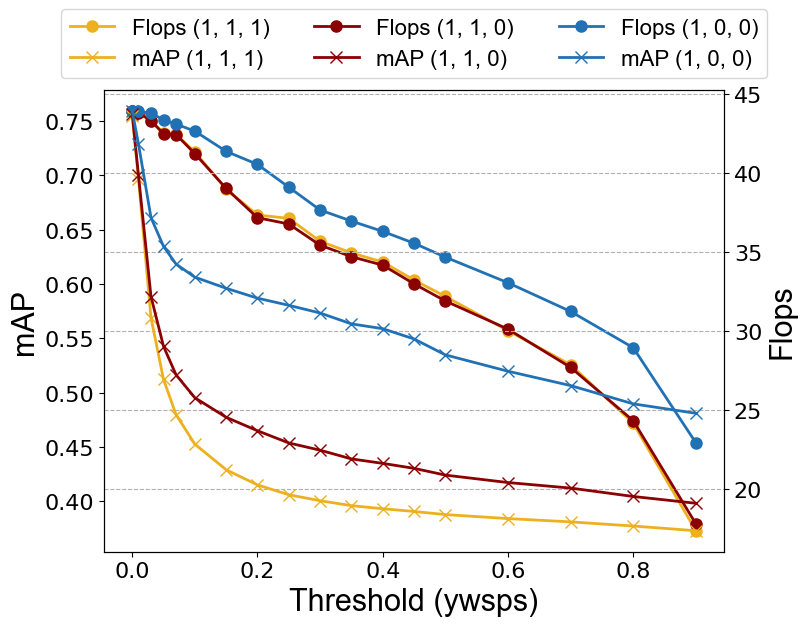

In [46]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.font_manager import FontProperties
font1 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=22)
font2 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=16)
font3 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=22)
# 配置文件夹路径
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_s_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_dotav2test/infos"
start_time = "20250213_114200"
end_time = "20250213_124413"

# 定义一个函数来提取log文件中的dota/mAP、is_sparse_levels、score_th
def extract_data_from_log(log_file):
    dota_map = None
    is_sparse_levels = None
    score_th = None

    with open(log_file, 'r') as f:
        lines = f.readlines()
        flops_pattern = r"Flops:\s*(\d+\.\d+)([G])"
        for line in lines:
            if "Flops" in line:
                match = re.search(flops_pattern, line)
                if match:
                    flops_value = float(match.group(1))
        
        # 查找is_sparse_levels 和 score_th
        for line in lines:
            if "is_sparse_levels" in line:
                is_sparse_levels_match = re.search(r'is_sparse_levels\s*=\s*(\[[^\]]*\])', ''.join(lines), re.DOTALL)
                if is_sparse_levels_match:
                    is_sparse_levels = eval(is_sparse_levels_match.group(1))
            if "score_th" in line:
                # score_th_match = re.search(r'score_th = (\d+\.\d+)', line)
                score_th_match = re.search(r'score_th = (\d+(\.\d+)?)', line)
                if score_th_match:
                    score_th = float(score_th_match.group(1))

    return flops_value, is_sparse_levels, score_th
colors = {
    "FP32": "#edb120",  # 深蓝色
    "FP16": "darkred",  # 粉色
    "INT8": "#2171b5",  # 浅黄色
}


# 获取目标文件夹，筛选出符合时间区间的文件夹
folders = []
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        if start_time <= folder <= end_time:
            folders.append(folder)

# 存储数据：以is_sparse_levels为key，score_th为子key，dota_map为值
results_flops = {}

# 遍历文件夹，读取数据
for folder in folders:
    log_file = os.path.join(base_dir, folder, f"{folder}.log")
    
    if os.path.exists(log_file):
        flops_value, is_sparse_levels, score_th = extract_data_from_log(log_file)
        
        if is_sparse_levels is not None and score_th is not None and flops_value is not None:
            # 将数据保存到results字典中，按is_sparse_levels和score_th分类
            if tuple(is_sparse_levels) not in results_flops:
                results_flops[tuple(is_sparse_levels)] = {}

            if score_th not in results_flops[tuple(is_sparse_levels)]:
                results_flops[tuple(is_sparse_levels)][score_th] = []

            results_flops[tuple(is_sparse_levels)][score_th].append(flops_value)

fig, ax1 = plt.subplots(figsize=(8,6))

ax2 = ax1.twinx()
handles = []
labels = []
color_index = 0
color_list = list(colors.values())
# 循环绘制每个 is_sparse_levels 配置
for is_sparse_levels, score_map in results_flops.items():
    score_th_list = sorted(score_map.keys())  # 按 score_th 升序排序
    
    # 计算 mean_flops_value_list 和 mean_mAP_list
    mean_flops_value_list = [np.mean(score_map[score_th]) for score_th in score_th_list]  # 对同一score_th的Flops取平均值
    mean_mAP_list = [np.mean(results[is_sparse_levels][score_th]) for score_th in score_th_list]  # 对同一score_th的dota/mAP取平均值
    # 根据 is_sparse_levels 选择颜色
    color = color_list[color_index % len(color_list)]
    color_index += 1
    # 使用不同的颜色和标记绘制每个 is_sparse_levels 配置的曲线
    line1, = ax1.plot(score_th_list, mean_mAP_list, label=f"mAP {is_sparse_levels}", marker='o', color=color, linewidth=2, markersize=8)
    line2, = ax2.plot(score_th_list, mean_flops_value_list, label=f"Flops {is_sparse_levels}", marker='x', color=color, markerfacecolor='none', linewidth=2, markersize=8)
    
    handles.extend([line1, line2])
    labels.extend([f"Flops {is_sparse_levels}", f"mAP {is_sparse_levels}"])
    
# 设置图表标题
# plt.title(f'Flops and mAP vs score_th for different is_sparse_levels (DOTAv2 val)')

# 设置x轴和y轴标签
ax1.set_xlabel("Threshold (ywsps)", fontproperties=font3)
ax2.set_ylabel('Flops', fontproperties=font3)  # 左边y轴（Flops）
ax1.set_ylabel('mAP', fontproperties=font3)  # 右边y轴（mAP）
ax1.tick_params(axis='y', labelsize=16)  # 设置左边y轴刻度字体大小
ax1.tick_params(axis='x', labelsize=16)  # 设置x轴刻度字体大小
ax2.tick_params(axis='y', labelsize=16) 
# ax2.invert_yaxis() 
# 显示图例
plt.legend(handles=handles, labels=labels, loc='center', bbox_to_anchor=(0.5, 1.1), ncol=3, prop=font2)


plt.grid(True, which="both", linestyle="--", linewidth=0.8)

# 显示图表
plt.savefig("ywsps.jpg", dpi=300)
plt.show()


## ywspl-single

In [60]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# 配置文件夹路径
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_l_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_dotav2test_single_task"
start_time = "20250213_002139"
end_time = "20250213_041817"

# 定义一个函数来提取log文件中的dota/mAP、is_sparse_levels、score_th
def extract_data_from_log(log_file):
    dota_map = None
    is_sparse_levels = None
    score_th = None

    with open(log_file, 'r') as f:
        lines = f.readlines()
        # 获取最后一行，提取dota/mAP
        last_line = lines[-1]
        dota_map_match = re.search(r"dota/mAP: (\d+\.\d+)", last_line)
        if dota_map_match:
            dota_map = float(dota_map_match.group(1))
        
        # 查找is_sparse_levels 和 score_th
        for line in lines:
            if "is_sparse_levels" in line:
                is_sparse_levels_match = re.search(r'is_sparse_levels\s*=\s*(\[[^\]]*\])', ''.join(lines), re.DOTALL)
                if is_sparse_levels_match:
                    is_sparse_levels = eval(is_sparse_levels_match.group(1))
            if "score_th" in line:
                # score_th_match = re.search(r'score_th = (\d+\.\d+)', line)
                score_th_match = re.search(r'score_th = (\d+(\.\d+)?)', line)
                if score_th_match:
                    score_th = float(score_th_match.group(1))

    return dota_map, is_sparse_levels, score_th


# 获取目标文件夹，筛选出符合时间区间的文件夹
folders = []
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        if start_time <= folder <= end_time:
            folders.append(folder)

# 存储数据：以is_sparse_levels为key，score_th为子key，dota_map为值
results = {}

# 遍历文件夹，读取数据
for folder in folders:
    log_file = os.path.join(base_dir, folder, f"{folder}.log")
    
    if os.path.exists(log_file):
        dota_map, is_sparse_levels, score_th = extract_data_from_log(log_file)
        
        if is_sparse_levels is not None and score_th is not None and dota_map is not None:
            # 将数据保存到results字典中，按is_sparse_levels和score_th分类
            if tuple(is_sparse_levels) not in results:
                results[tuple(is_sparse_levels)] = {}

            if score_th not in results[tuple(is_sparse_levels)]:
                results[tuple(is_sparse_levels)][score_th] = []

            results[tuple(is_sparse_levels)][score_th].append(dota_map)
# ###ywspl-single add  th=0 ###
# results[(1,0,0)].update({0: [0.8866]})
# results[(1,1,0)].update({0: [0.8866]})
# results[(1,1,1)].update({0: [0.8866]})

# # 绘制图表
# plt.figure(figsize=(10, 6))

# # 遍历不同的is_sparse_levels组合，分别绘制不同的曲线
# for is_sparse_levels, score_map in results.items():
#     score_th_list = sorted(score_map.keys())  # 按score_th升序排序
#     mean_dota_map_list = [np.mean(score_map[score_th]) for score_th in score_th_list]  # 对同一score_th的dota/mAP取平均值

#     plt.plot(score_th_list, mean_dota_map_list, label=f'is_sparse_levels = {is_sparse_levels}')

# # 设置图表标签和标题
# plt.xlabel('score_th')
# plt.ylabel('dota/mAP')
# plt.title('dota/mAP vs score_th for different is_sparse_levels')
# plt.legend()
# plt.grid(True)

# # 显示图表
# plt.show()


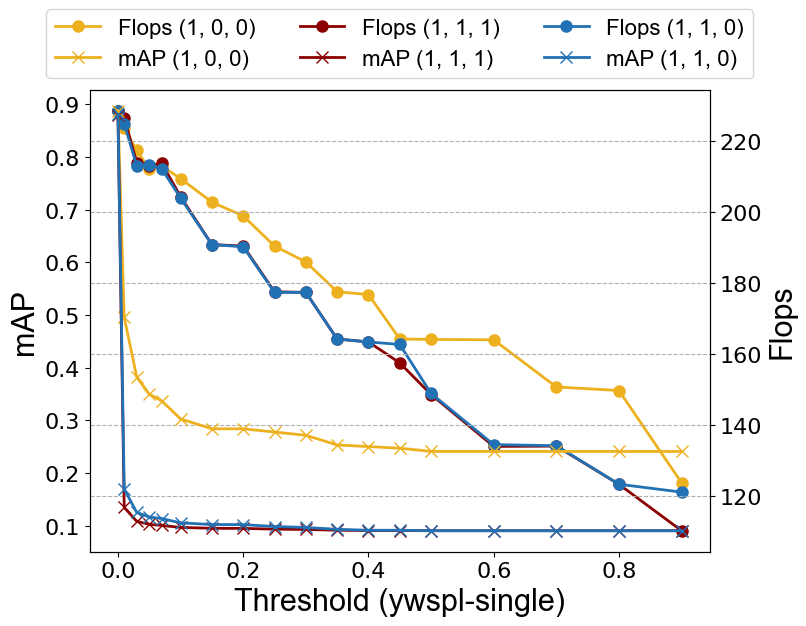

In [62]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.font_manager import FontProperties
font1 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=22)
font2 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=16)
font3 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=22)
# 配置文件夹路径
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_l_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_dotav2test_single_task/infos"
start_time = "20250213_113826"
end_time = "20250213_124057"

# 定义一个函数来提取log文件中的dota/mAP、is_sparse_levels、score_th
def extract_data_from_log(log_file):
    dota_map = None
    is_sparse_levels = None
    score_th = None

    with open(log_file, 'r') as f:
        lines = f.readlines()
        flops_pattern = r"Flops:\s*(\d+\.\d+)([G])"
        for line in lines:
            if "Flops" in line:
                match = re.search(flops_pattern, line)
                if match:
                    flops_value = float(match.group(1))
        
        # 查找is_sparse_levels 和 score_th
        for line in lines:
            if "is_sparse_levels" in line:
                is_sparse_levels_match = re.search(r'is_sparse_levels\s*=\s*(\[[^\]]*\])', ''.join(lines), re.DOTALL)
                if is_sparse_levels_match:
                    is_sparse_levels = eval(is_sparse_levels_match.group(1))
            if "score_th" in line:
                # score_th_match = re.search(r'score_th = (\d+\.\d+)', line)
                score_th_match = re.search(r'score_th = (\d+(\.\d+)?)', line)
                if score_th_match:
                    score_th = float(score_th_match.group(1))

    return flops_value, is_sparse_levels, score_th
colors = {
    "FP32": "#edb120",  # 深蓝色
    "FP16": "darkred",  # 粉色
    "INT8": "#2171b5",  # 浅黄色
}


# 获取目标文件夹，筛选出符合时间区间的文件夹
folders = []
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        if start_time <= folder <= end_time:
            folders.append(folder)

# 存储数据：以is_sparse_levels为key，score_th为子key，dota_map为值
results_flops = {}

# 遍历文件夹，读取数据
for folder in folders:
    log_file = os.path.join(base_dir, folder, f"{folder}.log")
    
    if os.path.exists(log_file):
        flops_value, is_sparse_levels, score_th = extract_data_from_log(log_file)
        
        if is_sparse_levels is not None and score_th is not None and flops_value is not None:
            # 将数据保存到results字典中，按is_sparse_levels和score_th分类
            if tuple(is_sparse_levels) not in results_flops:
                results_flops[tuple(is_sparse_levels)] = {}

            if score_th not in results_flops[tuple(is_sparse_levels)]:
                results_flops[tuple(is_sparse_levels)][score_th] = []

            results_flops[tuple(is_sparse_levels)][score_th].append(flops_value)

fig, ax1 = plt.subplots(figsize=(8,6))

ax2 = ax1.twinx()
handles = []
labels = []
color_index = 0
color_list = list(colors.values())
# 循环绘制每个 is_sparse_levels 配置
for is_sparse_levels, score_map in results_flops.items():
    score_th_list = sorted(score_map.keys())  # 按 score_th 升序排序
    
    # 计算 mean_flops_value_list 和 mean_mAP_list
    mean_flops_value_list = [np.mean(score_map[score_th]) for score_th in score_th_list]  # 对同一score_th的Flops取平均值
    mean_mAP_list = [np.mean(results[is_sparse_levels][score_th]) for score_th in score_th_list]  # 对同一score_th的dota/mAP取平均值
    # 根据 is_sparse_levels 选择颜色
    color = color_list[color_index % len(color_list)]
    color_index += 1
    # 使用不同的颜色和标记绘制每个 is_sparse_levels 配置的曲线
    line1, = ax1.plot(score_th_list, mean_mAP_list, label=f"mAP {is_sparse_levels}", marker='o', color=color, linewidth=2, markersize=8)
    line2, = ax2.plot(score_th_list, mean_flops_value_list, label=f"Flops {is_sparse_levels}", marker='x', color=color, markerfacecolor='none', linewidth=2, markersize=8)
    
    handles.extend([line1, line2])
    labels.extend([f"Flops {is_sparse_levels}", f"mAP {is_sparse_levels}"])
    
# 设置图表标题
# plt.title(f'Flops and mAP vs score_th for different is_sparse_levels (DOTAv2 val)')

# 设置x轴和y轴标签
ax1.set_xlabel("Threshold (ywspl-single)", fontproperties=font3)
ax2.set_ylabel('Flops', fontproperties=font3)  # 左边y轴（Flops）
ax1.set_ylabel('mAP', fontproperties=font3)  # 右边y轴（mAP）
ax1.tick_params(axis='y', labelsize=16)  # 设置左边y轴刻度字体大小
ax1.tick_params(axis='x', labelsize=16)  # 设置x轴刻度字体大小
ax2.tick_params(axis='y', labelsize=16) 
# ax2.invert_yaxis() 
# 显示图例
plt.legend(handles=handles, labels=labels, loc='center', bbox_to_anchor=(0.5, 1.1), ncol=3, prop=font2)


plt.grid(True, which="both", linestyle="--", linewidth=0.8)

# 显示图表
plt.savefig("ywspl-single.jpg", dpi=300)
plt.show()


## ywspm-single

In [69]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# 配置文件夹路径
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_m_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_dotav2test_single_task"
start_time = "20250213_003509"
end_time = "20250213_041707"

# 定义一个函数来提取log文件中的dota/mAP、is_sparse_levels、score_th
def extract_data_from_log(log_file):
    dota_map = None
    is_sparse_levels = None
    score_th = None

    with open(log_file, 'r') as f:
        lines = f.readlines()
        # 获取最后一行，提取dota/mAP
        last_line = lines[-1]
        dota_map_match = re.search(r"dota/mAP: (\d+\.\d+)", last_line)
        if dota_map_match:
            dota_map = float(dota_map_match.group(1))
        
        # 查找is_sparse_levels 和 score_th
        for line in lines:
            if "is_sparse_levels" in line:
                is_sparse_levels_match = re.search(r'is_sparse_levels\s*=\s*(\[[^\]]*\])', ''.join(lines), re.DOTALL)
                if is_sparse_levels_match:
                    is_sparse_levels = eval(is_sparse_levels_match.group(1))
            if "score_th" in line:
                # score_th_match = re.search(r'score_th = (\d+\.\d+)', line)
                score_th_match = re.search(r'score_th = (\d+(\.\d+)?)', line)
                if score_th_match:
                    score_th = float(score_th_match.group(1))

    return dota_map, is_sparse_levels, score_th


# 获取目标文件夹，筛选出符合时间区间的文件夹
folders = []
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        if start_time <= folder <= end_time:
            folders.append(folder)

# 存储数据：以is_sparse_levels为key，score_th为子key，dota_map为值
results = {}

# 遍历文件夹，读取数据
for folder in folders:
    log_file = os.path.join(base_dir, folder, f"{folder}.log")
    
    if os.path.exists(log_file):
        dota_map, is_sparse_levels, score_th = extract_data_from_log(log_file)
        
        if is_sparse_levels is not None and score_th is not None and dota_map is not None:
            # 将数据保存到results字典中，按is_sparse_levels和score_th分类
            if tuple(is_sparse_levels) not in results:
                results[tuple(is_sparse_levels)] = {}

            if score_th not in results[tuple(is_sparse_levels)]:
                results[tuple(is_sparse_levels)][score_th] = []

            results[tuple(is_sparse_levels)][score_th].append(dota_map)

# # 绘制图表
# plt.figure(figsize=(10, 6))

# # 遍历不同的is_sparse_levels组合，分别绘制不同的曲线
# for is_sparse_levels, score_map in results.items():
#     score_th_list = sorted(score_map.keys())  # 按score_th升序排序
#     mean_dota_map_list = [np.mean(score_map[score_th]) for score_th in score_th_list]  # 对同一score_th的dota/mAP取平均值

#     plt.plot(score_th_list, mean_dota_map_list, label=f'is_sparse_levels = {is_sparse_levels}')

# # 设置图表标签和标题
# plt.xlabel('score_th')
# plt.ylabel('dota/mAP')
# plt.title('dota/mAP vs score_th for different is_sparse_levels')
# plt.legend()
# plt.grid(True)

# # 显示图表
# plt.show()


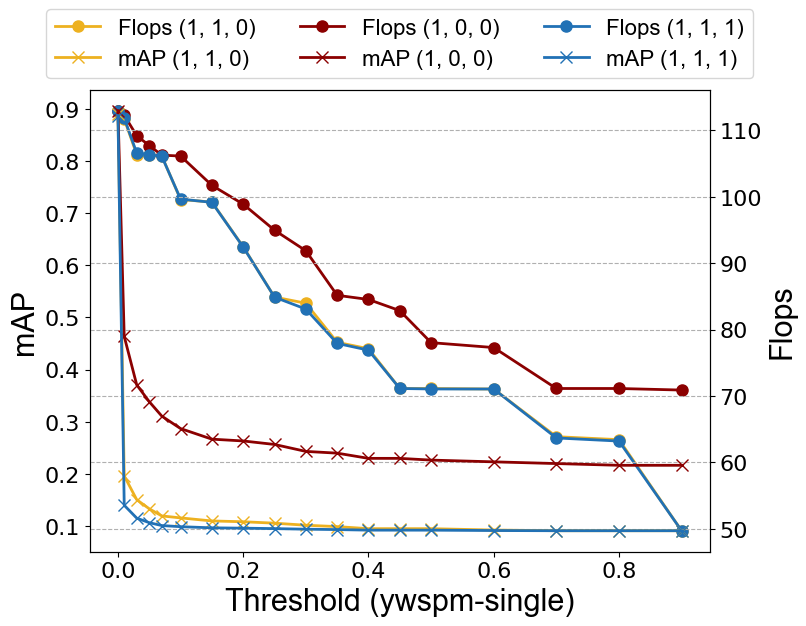

In [71]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.font_manager import FontProperties
font1 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=22)
font2 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=16)
font3 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=22)
# 配置文件夹路径
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_m_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_dotav2test_single_task/infos"
start_time = "20250213_114051"
end_time = "20250213_123807"

# 定义一个函数来提取log文件中的dota/mAP、is_sparse_levels、score_th
def extract_data_from_log(log_file):
    dota_map = None
    is_sparse_levels = None
    score_th = None

    with open(log_file, 'r') as f:
        lines = f.readlines()
        flops_pattern = r"Flops:\s*(\d+\.\d+)([G])"
        for line in lines:
            if "Flops" in line:
                match = re.search(flops_pattern, line)
                if match:
                    flops_value = float(match.group(1))
        
        # 查找is_sparse_levels 和 score_th
        for line in lines:
            if "is_sparse_levels" in line:
                is_sparse_levels_match = re.search(r'is_sparse_levels\s*=\s*(\[[^\]]*\])', ''.join(lines), re.DOTALL)
                if is_sparse_levels_match:
                    is_sparse_levels = eval(is_sparse_levels_match.group(1))
            if "score_th" in line:
                # score_th_match = re.search(r'score_th = (\d+\.\d+)', line)
                score_th_match = re.search(r'score_th = (\d+(\.\d+)?)', line)
                if score_th_match:
                    score_th = float(score_th_match.group(1))

    return flops_value, is_sparse_levels, score_th
colors = {
    "FP32": "#edb120",  # 深蓝色
    "FP16": "darkred",  # 粉色
    "INT8": "#2171b5",  # 浅黄色
}


# 获取目标文件夹，筛选出符合时间区间的文件夹
folders = []
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        if start_time <= folder <= end_time:
            folders.append(folder)

# 存储数据：以is_sparse_levels为key，score_th为子key，dota_map为值
results_flops = {}

# 遍历文件夹，读取数据
for folder in folders:
    log_file = os.path.join(base_dir, folder, f"{folder}.log")
    
    if os.path.exists(log_file):
        flops_value, is_sparse_levels, score_th = extract_data_from_log(log_file)
        
        if is_sparse_levels is not None and score_th is not None and flops_value is not None:
            # 将数据保存到results字典中，按is_sparse_levels和score_th分类
            if tuple(is_sparse_levels) not in results_flops:
                results_flops[tuple(is_sparse_levels)] = {}

            if score_th not in results_flops[tuple(is_sparse_levels)]:
                results_flops[tuple(is_sparse_levels)][score_th] = []

            results_flops[tuple(is_sparse_levels)][score_th].append(flops_value)

fig, ax1 = plt.subplots(figsize=(8,6))

ax2 = ax1.twinx()
handles = []
labels = []
color_index = 0
color_list = list(colors.values())
# 循环绘制每个 is_sparse_levels 配置
for is_sparse_levels, score_map in results_flops.items():
    score_th_list = sorted(score_map.keys())  # 按 score_th 升序排序
    
    # 计算 mean_flops_value_list 和 mean_mAP_list
    mean_flops_value_list = [np.mean(score_map[score_th]) for score_th in score_th_list]  # 对同一score_th的Flops取平均值
    mean_mAP_list = [np.mean(results[is_sparse_levels][score_th]) for score_th in score_th_list]  # 对同一score_th的dota/mAP取平均值
    # 根据 is_sparse_levels 选择颜色
    color = color_list[color_index % len(color_list)]
    color_index += 1
    # 使用不同的颜色和标记绘制每个 is_sparse_levels 配置的曲线
    line1, = ax1.plot(score_th_list, mean_mAP_list, label=f"mAP {is_sparse_levels}", marker='o', color=color, linewidth=2, markersize=8)
    line2, = ax2.plot(score_th_list, mean_flops_value_list, label=f"Flops {is_sparse_levels}", marker='x', color=color, markerfacecolor='none', linewidth=2, markersize=8)
    
    handles.extend([line1, line2])
    labels.extend([f"Flops {is_sparse_levels}", f"mAP {is_sparse_levels}"])
    
# 设置图表标题
# plt.title(f'Flops and mAP vs score_th for different is_sparse_levels (DOTAv2 val)')

# 设置x轴和y轴标签
ax1.set_xlabel("Threshold (ywspm-single)", fontproperties=font3)
ax2.set_ylabel('Flops', fontproperties=font3)  # 左边y轴（Flops）
ax1.set_ylabel('mAP', fontproperties=font3)  # 右边y轴（mAP）
ax1.tick_params(axis='y', labelsize=16)  # 设置左边y轴刻度字体大小
ax1.tick_params(axis='x', labelsize=16)  # 设置x轴刻度字体大小
ax2.tick_params(axis='y', labelsize=16) 
# ax2.invert_yaxis() 
# 显示图例
plt.legend(handles=handles, labels=labels, loc='center', bbox_to_anchor=(0.5, 1.1), ncol=3, prop=font2)


plt.grid(True, which="both", linestyle="--", linewidth=0.8)

# 显示图表
plt.savefig("ywspm-single.jpg", dpi=300)
plt.show()

In [74]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

# 配置文件夹路径
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_s_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_dotav2test_single_task"
start_time = "20250213_003737"
end_time = "20250213_040931"

# 定义一个函数来提取log文件中的dota/mAP、is_sparse_levels、score_th
def extract_data_from_log(log_file):
    dota_map = None
    is_sparse_levels = None
    score_th = None

    with open(log_file, 'r') as f:
        lines = f.readlines()
        # 获取最后一行，提取dota/mAP
        last_line = lines[-1]
        dota_map_match = re.search(r"dota/mAP: (\d+\.\d+)", last_line)
        if dota_map_match:
            dota_map = float(dota_map_match.group(1))
        
        # 查找is_sparse_levels 和 score_th
        for line in lines:
            if "is_sparse_levels" in line:
                is_sparse_levels_match = re.search(r'is_sparse_levels\s*=\s*(\[[^\]]*\])', ''.join(lines), re.DOTALL)
                if is_sparse_levels_match:
                    is_sparse_levels = eval(is_sparse_levels_match.group(1))
            if "score_th" in line:
                # score_th_match = re.search(r'score_th = (\d+\.\d+)', line)
                score_th_match = re.search(r'score_th = (\d+(\.\d+)?)', line)
                if score_th_match:
                    score_th = float(score_th_match.group(1))

    return dota_map, is_sparse_levels, score_th


# 获取目标文件夹，筛选出符合时间区间的文件夹
folders = []
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        if start_time <= folder <= end_time:
            folders.append(folder)

# 存储数据：以is_sparse_levels为key，score_th为子key，dota_map为值
results = {}

# 遍历文件夹，读取数据
for folder in folders:
    log_file = os.path.join(base_dir, folder, f"{folder}.log")
    
    if os.path.exists(log_file):
        dota_map, is_sparse_levels, score_th = extract_data_from_log(log_file)
        
        if is_sparse_levels is not None and score_th is not None and dota_map is not None:
            # 将数据保存到results字典中，按is_sparse_levels和score_th分类
            if tuple(is_sparse_levels) not in results:
                results[tuple(is_sparse_levels)] = {}

            if score_th not in results[tuple(is_sparse_levels)]:
                results[tuple(is_sparse_levels)][score_th] = []

            results[tuple(is_sparse_levels)][score_th].append(dota_map)

# # 绘制图表
# plt.figure(figsize=(10, 6))

# # 遍历不同的is_sparse_levels组合，分别绘制不同的曲线
# for is_sparse_levels, score_map in results.items():
#     score_th_list = sorted(score_map.keys())  # 按score_th升序排序
#     mean_dota_map_list = [np.mean(score_map[score_th]) for score_th in score_th_list]  # 对同一score_th的dota/mAP取平均值

#     plt.plot(score_th_list, mean_dota_map_list, label=f'is_sparse_levels = {is_sparse_levels}')

# # 设置图表标签和标题
# plt.xlabel('score_th')
# plt.ylabel('dota/mAP')
# plt.title('dota/mAP vs score_th for different is_sparse_levels')
# plt.legend()
# plt.grid(True)

# # 显示图表
# plt.show()


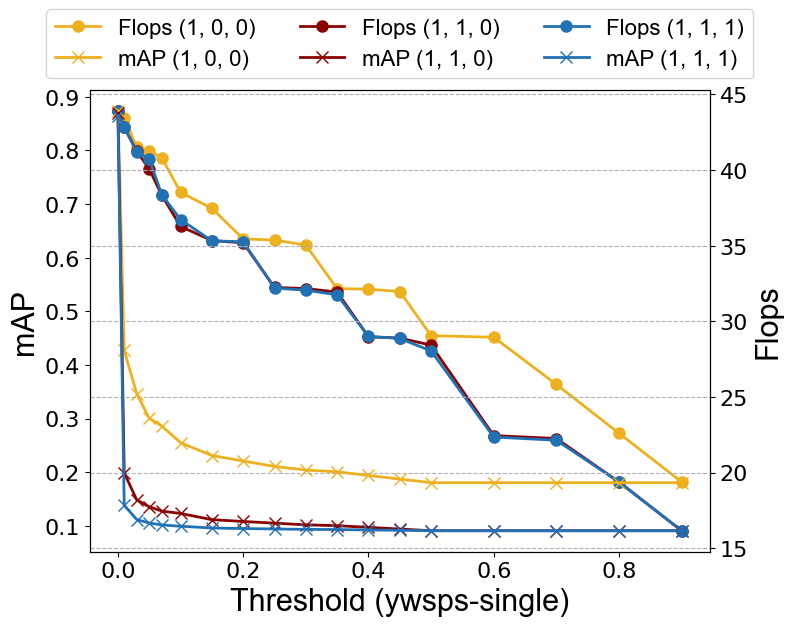

In [77]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from matplotlib.font_manager import FontProperties
font1 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=22)
font2 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=16)
font3 = FontProperties(fname='/mnt/data/becool1/wmq/fonts/arial/ARIAL.TTF', size=22)
# 配置文件夹路径
base_dir = "/mnt/data1/workspace/wmq/YOLO-World/work_dirs/yolo_world_sp_s_vlpan_bn_2e-4_100e_4x8gpus_od_vg_infer_simple_dotav2test_single_task/infos"
start_time = "20250213_114227"
end_time = "20250213_123714"

# 定义一个函数来提取log文件中的dota/mAP、is_sparse_levels、score_th
def extract_data_from_log(log_file):
    dota_map = None
    is_sparse_levels = None
    score_th = None

    with open(log_file, 'r') as f:
        lines = f.readlines()
        flops_pattern = r"Flops:\s*(\d+\.\d+)([G])"
        for line in lines:
            if "Flops" in line:
                match = re.search(flops_pattern, line)
                if match:
                    flops_value = float(match.group(1))
        
        # 查找is_sparse_levels 和 score_th
        for line in lines:
            if "is_sparse_levels" in line:
                is_sparse_levels_match = re.search(r'is_sparse_levels\s*=\s*(\[[^\]]*\])', ''.join(lines), re.DOTALL)
                if is_sparse_levels_match:
                    is_sparse_levels = eval(is_sparse_levels_match.group(1))
            if "score_th" in line:
                # score_th_match = re.search(r'score_th = (\d+\.\d+)', line)
                score_th_match = re.search(r'score_th = (\d+(\.\d+)?)', line)
                if score_th_match:
                    score_th = float(score_th_match.group(1))

    return flops_value, is_sparse_levels, score_th
colors = {
    "FP32": "#edb120",  # 深蓝色
    "FP16": "darkred",  # 粉色
    "INT8": "#2171b5",  # 浅黄色
}


# 获取目标文件夹，筛选出符合时间区间的文件夹
folders = []
for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    if os.path.isdir(folder_path):
        if start_time <= folder <= end_time:
            folders.append(folder)

# 存储数据：以is_sparse_levels为key，score_th为子key，dota_map为值
results_flops = {}

# 遍历文件夹，读取数据
for folder in folders:
    log_file = os.path.join(base_dir, folder, f"{folder}.log")
    
    if os.path.exists(log_file):
        flops_value, is_sparse_levels, score_th = extract_data_from_log(log_file)
        
        if is_sparse_levels is not None and score_th is not None and flops_value is not None:
            # 将数据保存到results字典中，按is_sparse_levels和score_th分类
            if tuple(is_sparse_levels) not in results_flops:
                results_flops[tuple(is_sparse_levels)] = {}

            if score_th not in results_flops[tuple(is_sparse_levels)]:
                results_flops[tuple(is_sparse_levels)][score_th] = []

            results_flops[tuple(is_sparse_levels)][score_th].append(flops_value)

fig, ax1 = plt.subplots(figsize=(8,6))

ax2 = ax1.twinx()
handles = []
labels = []
color_index = 0
color_list = list(colors.values())
# 循环绘制每个 is_sparse_levels 配置
for is_sparse_levels, score_map in results_flops.items():
    score_th_list = sorted(score_map.keys())  # 按 score_th 升序排序
    
    # 计算 mean_flops_value_list 和 mean_mAP_list
    mean_flops_value_list = [np.mean(score_map[score_th]) for score_th in score_th_list]  # 对同一score_th的Flops取平均值
    mean_mAP_list = [np.mean(results[is_sparse_levels][score_th]) for score_th in score_th_list]  # 对同一score_th的dota/mAP取平均值
    # 根据 is_sparse_levels 选择颜色
    color = color_list[color_index % len(color_list)]
    color_index += 1
    # 使用不同的颜色和标记绘制每个 is_sparse_levels 配置的曲线
    line1, = ax1.plot(score_th_list, mean_mAP_list, label=f"mAP {is_sparse_levels}", marker='o', color=color, linewidth=2, markersize=8)
    line2, = ax2.plot(score_th_list, mean_flops_value_list, label=f"Flops {is_sparse_levels}", marker='x', color=color, markerfacecolor='none', linewidth=2, markersize=8)
    
    handles.extend([line1, line2])
    labels.extend([f"Flops {is_sparse_levels}", f"mAP {is_sparse_levels}"])
    
# 设置图表标题
# plt.title(f'Flops and mAP vs score_th for different is_sparse_levels (DOTAv2 val)')

# 设置x轴和y轴标签
ax1.set_xlabel("Threshold (ywsps-single)", fontproperties=font3)
ax2.set_ylabel('Flops', fontproperties=font3)  # 左边y轴（Flops）
ax1.set_ylabel('mAP', fontproperties=font3)  # 右边y轴（mAP）
ax1.tick_params(axis='y', labelsize=16)  # 设置左边y轴刻度字体大小
ax1.tick_params(axis='x', labelsize=16)  # 设置x轴刻度字体大小
ax2.tick_params(axis='y', labelsize=16) 
# ax2.invert_yaxis() 
# 显示图例
plt.legend(handles=handles, labels=labels, loc='center', bbox_to_anchor=(0.5, 1.1), ncol=3, prop=font2)


plt.grid(True, which="both", linestyle="--", linewidth=0.8)

# 显示图表
plt.savefig("ywsps-single.jpg", dpi=300)
plt.show()

In [78]:
results

{(1, 1, 0): {0.05: [0.7651],
  0.2: [0.6276],
  0.4: [0.4525],
  0.5: [0.4368],
  0.03: [0.7982],
  0.6: [0.2682],
  0.1: [0.6581],
  0.07: [0.7162],
  0.01: [0.843],
  0.35: [0.5357],
  0.9: [0.0909],
  0.0: [0.8729],
  0.45: [0.45],
  0.15: [0.6317],
  0.8: [0.1818],
  0.25: [0.5443],
  0.7: [0.2628],
  0.3: [0.5423]},
 (1, 1, 1): {0.8: [0.1818],
  0.35: [0.5306],
  0.7: [0.2596],
  0.6: [0.2655],
  0.15: [0.6312],
  0.03: [0.7967],
  0.1: [0.6709],
  0.4: [0.453],
  0.07: [0.7172],
  0.45: [0.4493],
  0.01: [0.8439],
  0.3: [0.5393],
  0.2: [0.6295],
  0.5: [0.426],
  0.0: [0.8731],
  0.25: [0.5431],
  0.05: [0.7839],
  0.9: [0.0909]},
 (1, 0, 0): {0.6: [0.4515],
  0.05: [0.7983],
  0.03: [0.8053],
  0.8: [0.2727],
  0.7: [0.3636],
  0.07: [0.7863],
  0.25: [0.6327],
  0.9: [0.1818],
  0.5: [0.4545],
  0.0: [0.8738],
  0.01: [0.8606],
  0.45: [0.5368],
  0.35: [0.5422],
  0.3: [0.6234],
  0.1: [0.7215],
  0.2: [0.6348],
  0.15: [0.6919],
  0.4: [0.5412]}}

In [79]:
results_flops

{(1, 0, 0): {0.5: [19.328],
  0.1: [21.971],
  0.6: [19.328],
  0.07: [23.071],
  0.8: [19.328],
  0.3: [20.163],
  0.03: [25.202],
  0.35: [20.043],
  0.4: [19.805],
  0.7: [19.328],
  0.25: [20.401],
  0.05: [23.582],
  0.0: [43.92],
  0.2: [20.76],
  0.45: [19.566],
  0.15: [21.122],
  0.9: [19.328],
  0.01: [28.071]},
 (1, 1, 0): {0.1: [17.293],
  0.03: [18.186],
  0.25: [16.651],
  0.2: [16.763],
  0.15: [16.881],
  0.6: [16.151],
  0.0: [43.738],
  0.8: [16.151],
  0.05: [17.731],
  0.35: [16.484],
  0.9: [16.151],
  0.3: [16.54],
  0.01: [19.97],
  0.07: [17.45],
  0.7: [16.151],
  0.4: [16.373],
  0.45: [16.262],
  0.5: [16.151]},
 (1, 1, 1): {0.45: [16.177],
  0.7: [16.151],
  0.8: [16.151],
  0.07: [16.532],
  0.0: [43.595],
  0.01: [17.826],
  0.2: [16.295],
  0.3: [16.241],
  0.35: [16.228],
  0.9: [16.151],
  0.5: [16.151],
  0.1: [16.449],
  0.05: [16.658],
  0.03: [16.891],
  0.25: [16.267],
  0.15: [16.33],
  0.6: [16.151],
  0.4: [16.202]}}

In [82]:
import pandas as pd
# Prepare data for output table
score_ths = sorted(set(list(results[(1, 1, 0)].keys()) + list(results_flops[(1, 1, 0)].keys())))

# Create dataframe for the results
data = []
for score_th in score_ths:
    row = {
        "score_th": score_th,
        "(1, 1, 0) mAP": results[(1, 1, 0)].get(score_th, [None])[0],
        "(1, 1, 0) Flops": results_flops[(1, 1, 0)].get(score_th, [None])[0],
        "(1, 1, 1) mAP": results[(1, 1, 1)].get(score_th, [None])[0],
        "(1, 1, 1) Flops": results_flops[(1, 1, 1)].get(score_th, [None])[0],
        "(1, 0, 0) mAP": results[(1, 0, 0)].get(score_th, [None])[0],
        "(1, 0, 0) Flops": results_flops[(1, 0, 0)].get(score_th, [None])[0],
    }
    data.append(row)

df = pd.DataFrame(data)



In [83]:
df

score_th  (1, 1, 0) mAP  (1, 1, 0) Flops  (1, 1, 1) mAP  (1, 1, 1) Flops  \
0       0.00         0.8729           43.738         0.8731           43.595   
1       0.01         0.8430           19.970         0.8439           17.826   
2       0.03         0.7982           18.186         0.7967           16.891   
3       0.05         0.7651           17.731         0.7839           16.658   
4       0.07         0.7162           17.450         0.7172           16.532   
5       0.10         0.6581           17.293         0.6709           16.449   
6       0.15         0.6317           16.881         0.6312           16.330   
7       0.20         0.6276           16.763         0.6295           16.295   
8       0.25         0.5443           16.651         0.5431           16.267   
9       0.30         0.5423           16.540         0.5393           16.241   
10      0.35         0.5357           16.484         0.5306           16.228   
11      0.40         0.4525           16.373         0.4530           16.202   
12      0.45         0.4500           16.262         0.4493           16.177   
13      0.50         0.4368           16.151         0.4260           16.151   
14      0.60         0.2682           16.151         0.2655           16.151   
15      0.70         0.2628           16.151         0.2596           16.151   
16      0.80         0.1818           16.151         0.1818           16.151   
17      0.90         0.0909           16.151         0.0909           16.151   

    (1, 0, 0) mAP  (1, 0, 0) Flops  
0          0.8738           43.920  
1          0.8606           28.071  
2          0.8053           25.202  
3          0.7983           23.582  
4          0.7863           23.071  
5          0.7215           21.971  
6          0.6919           21.122  
7          0.6348           20.760  
8          0.6327           20.401  
9          0.6234           20.163  
10         0.5422           20.043  
11         0.5412           19.805  
12         0.5368           19.566  
13         0.4545           19.328  
14         0.4515           19.328  
15         0.3636           19.328  
16         0.2727           19.328  
17         0.1818           19.328